In [7]:
import pandas as pd
import mne
import os
import numpy as np
from mne.time_frequency import tfr_morlet
import ast

In [8]:
enforced_fix_subs=['243','249','254','257','248','264','258']
exclude_subs=['224','214','243','247','226','252','234','228','237']

In [9]:
ROOT_preproc='/data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad_removingNonFixationTrials/'

preproc_cue_eps={}
preproc_probe_eps={}
for s in enforced_fix_subs:
    cue=mne.read_epochs(ROOT_preproc+s+'/'+'cue_enforcedFix-epo.fif')
    #probe=mne.read_epochs(ROOT_preproc+s+'/'+'probe events-epo.fif')
    preproc_cue_eps[s]=cue
    #preproc_probe_eps[s]=probe

Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad_removingNonFixationTrials/243/cue_enforcedFix-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
453 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad_removingNonFixationTrials/249/cue_enforcedFix-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
503 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad_removingNonFixationTrials/254/cue_enforcedFix-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
  

In [10]:
right_stim=['1','3','5']
center_stim=['6','12']
left_stim=['7','9','11']

In [11]:
# We have to loop through each subject, each condition, 
# and find every trial that is *not* in the L, R, or center,
# and drop those tirals from 3 copies of the original epochs to get three
# copies that are only L, R, or Center trials

conditions=['tarShortCue_trig','disShortCue_trig',
           'tarLongCue_trig','disLongCue_trig']#,'neutShortCue_trig','neutLongCue_trig']
preprocCues_LeftH={}
preprocCues_RightH={}
preprocCues_Neutrals={}

for sub in preproc_cue_eps.keys():
    
    preprocCues_LeftH[sub]={}
    preprocCues_RightH[sub]={}
    preprocCues_Neutrals[sub]={}
    
    # load cue_epochs for this sub
    cue_eps=preproc_cue_eps[sub]
    
    # loop thru conditions
    for cond in conditions:
        epsForThisCond=cue_eps[cond]
                    
        # set up empty lists to be populated with trials that are NOT L/R/center
        not_right=[]
        not_left=[]
        # will populate w bools where True== drop this trial

        # loop thru each trial, and check out the metadata
        for trial_n in range(len(epsForThisCond)):
            this_trial=epsForThisCond[trial_n]

            assert this_trial.metadata['trial_type'].iloc[0] in cond            
            # grab out the behav data of this trial
            this_trial_StimLoc=this_trial.metadata['tar,dis stim_loc'].iloc[0]
            this_trial_StimLoc=ast.literal_eval(this_trial_StimLoc) # turn it into a literal tuple

            # identify the condition of interest and pull out that stim loc
            if 'tar' in cond:
                thisClockPos=this_trial_StimLoc[0] 
                # if its the target that was the color singleton, we care about which
                                        # hemisphere that was in
            elif 'dis' in cond:
                thisClockPos=this_trial_StimLoc[1]

            # if the the clock pos is on the right side of the screen, 
                # then we want to document as not-not right, not left, and not center
            if thisClockPos in right_stim:
                not_right.append(False)
                not_left.append(True)
            elif thisClockPos in left_stim:
                not_right.append(True)
                not_left.append(False)
            else:
                not_right.append(True)
                not_left.append(True)

        print(len(not_right),len(not_left),len(epsForThisCond))
        assert len(not_right) == len(not_left) == len(epsForThisCond)

        # make three copies of the original epochs for this condition
        all_Rights=epsForThisCond.copy()
        all_Lefts=epsForThisCond.copy()

        # then drop all of the epochs that are "True" in not being on the side of the screen we want
        all_Rights.drop(indices=np.asarray(not_right),reason='Dropping all left and centers')
        all_Lefts.drop(indices=np.asarray(not_left),reason='Dropping all right and centers')



        # now put it into a dict
        preprocCues_LeftH[sub][cond]=all_Lefts
        preprocCues_RightH[sub][cond]=all_Rights
        
        
        
            

65 65 65
Dropped 43 epochs
Dropped 44 epochs
59 59 59
Dropped 32 epochs
Dropped 39 epochs
83 83 83
Dropped 55 epochs
Dropped 49 epochs
83 83 83
Dropped 57 epochs
Dropped 53 epochs
86 86 86
Dropped 58 epochs
Dropped 55 epochs
71 71 71
Dropped 43 epochs
Dropped 41 epochs
79 79 79
Dropped 51 epochs
Dropped 48 epochs
91 91 91
Dropped 57 epochs
Dropped 60 epochs
94 94 94
Dropped 59 epochs
Dropped 64 epochs
87 87 87
Dropped 56 epochs
Dropped 55 epochs
91 91 91
Dropped 62 epochs
Dropped 51 epochs
95 95 95
Dropped 54 epochs
Dropped 65 epochs
86 86 86
Dropped 50 epochs
Dropped 53 epochs
87 87 87
Dropped 49 epochs
Dropped 61 epochs
97 97 97
Dropped 60 epochs
Dropped 65 epochs
98 98 98
Dropped 65 epochs
Dropped 62 epochs
83 83 83
Dropped 53 epochs
Dropped 53 epochs
91 91 91
Dropped 57 epochs
Dropped 60 epochs
83 83 83
Dropped 59 epochs
Dropped 52 epochs
85 85 85
Dropped 44 epochs
Dropped 61 epochs
87 87 87
Dropped 59 epochs
Dropped 57 epochs
82 82 82
Dropped 64 epochs
Dropped 35 epochs
89 89 89
D

In [12]:
preprocCues_LeftH['249']

{'tarShortCue_trig': <EpochsFIF  |   31 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~19.4 MB, data loaded, with metadata,
  'tarShortCue_trig': 31>,
 'disShortCue_trig': <EpochsFIF  |   30 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~18.8 MB, data loaded, with metadata,
  'disShortCue_trig': 30>,
 'tarLongCue_trig': <EpochsFIF  |   31 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~19.4 MB, data loaded, with metadata,
  'tarLongCue_trig': 31>,
 'disLongCue_trig': <EpochsFIF  |   31 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~19.4 MB, data loaded, with metadata,
  'disLongCue_trig': 31>}

In [13]:
preproc_cue_eps['249']

<EpochsFIF  |   503 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~312.4 MB, data loaded, with metadata,
 'disLongCue_trig': 91
 'disShortCue_trig': 71
 'neutLongCue_trig': 94
 'neutShortCue_trig': 82
 'tarLongCue_trig': 79
 'tarShortCue_trig': 86>

In [20]:
freqs=np.arange(.5,38.,2.)
n_cycles = freqs / 2.
leftPost_elecs=['CP5','CP3','P7','P5','P3','PO3','PO7']
rightPost_elecs=['CP4','CP6','P4','P6','P8','PO4','PO8']
all_conds=['tarShortCue_trig','disShortCue_trig',
           'tarLongCue_trig','disLongCue_trig']
all_subs_Lefts={}
all_subs_Rights={}
all_subs_Neutrals={}

for SubDict in [preprocCues_LeftH, preprocCues_RightH]:
    
    for cond in all_conds: 
        # loading an example subject to steal the python object's structure
        # and overwrite the subject data with a group average
        skeleton_obj=mne.time_frequency.tfr_morlet(SubDict['249'][cond],freqs=freqs,n_cycles=n_cycles,
                                                   average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
        thisCond_allSubsDat=[]
        for s in preproc_cue_eps.keys():
            #print('\n\n\n')
            thisSub=SubDict[s][cond]
            print('extracting sub {0}, cond {1}'.format(s,cond))
            subDat=mne.time_frequency.tfr_morlet(thisSub,freqs=freqs,n_cycles=n_cycles,average=True,
                                                     use_fft=True,return_itc=False, decim=2, n_jobs=1)
            thisCond_allSubsDat.append(subDat.data)
            
        # compiling all subjects' data for this condition, in this hemisphere
        all_subs_thisCond=np.stack(thisCond_allSubsDat)
        # and averaging across the "subject" dimension
        assert all_subs_thisCond.shape[0] == len(list(preproc_cue_eps.keys()))
        all_subs_thisCond=all_subs_thisCond.mean(axis=0)
        # then feeding that into the skeleton MNE averageTFR object
        skeleton_obj.data=all_subs_thisCond

        skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        
        if SubDict==preprocCues_LeftH:
            all_subs_Lefts[cond]=skeleton_obj
            print('Finished with left hemis for this cond')
        elif SubDict==preprocCues_RightH:
            all_subs_Rights[cond]=skeleton_obj
            print('Finished with right hemis for this cond')

neuts=['neutLongCue_trig','neutShortCue_trig']
for SubDict in [preproc_cue_eps]:
    
    for cond in neuts: 
        # loading an example subject to steal the python object's structure
        # and overwrite the subject data with a group average
        skeleton_obj=mne.time_frequency.tfr_morlet(SubDict['249'][cond],freqs=freqs,n_cycles=n_cycles,
                                                   average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
        thisCond_allSubsDat=[]
        for s in preproc_cue_eps.keys():
            #print('\n\n\n')
            thisSub=SubDict[s][cond]
            print('extracting sub {0}, cond {1}'.format(s,cond))
            subDat=mne.time_frequency.tfr_morlet(thisSub,freqs=freqs,n_cycles=n_cycles,average=True,
                                                     use_fft=True,return_itc=False, decim=2, n_jobs=1)
            thisCond_allSubsDat.append(subDat.data)
            
        # compiling all subjects' data for this condition, in this hemisphere
        all_subs_thisCond=np.stack(thisCond_allSubsDat)
        # and averaging across the "subject" dimension
        assert all_subs_thisCond.shape[0] == len(list(preproc_cue_eps.keys()))
        all_subs_thisCond=all_subs_thisCond.mean(axis=0)
        # then feeding that into the skeleton MNE averageTFR object
        skeleton_obj.data=all_subs_thisCond

        skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        

        all_subs_Neutrals[cond]=skeleton_obj
        print('Finished with all subs epochs for this cond')


extracting sub 243, cond tarShortCue_trig
extracting sub 249, cond tarShortCue_trig
extracting sub 254, cond tarShortCue_trig
extracting sub 257, cond tarShortCue_trig
extracting sub 248, cond tarShortCue_trig
extracting sub 264, cond tarShortCue_trig
extracting sub 258, cond tarShortCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 243, cond disShortCue_trig
extracting sub 249, cond disShortCue_trig
extracting sub 254, cond disShortCue_trig
extracting sub 257, cond disShortCue_trig
extracting sub 248, cond disShortCue_trig
extracting sub 264, cond disShortCue_trig
extracting sub 258, cond disShortCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 243, cond tarLongCue_trig
extracting sub 249, cond tarLongCue_trig
extracting sub 254, cond tarLongCue_trig
extracting sub 257, cond tarLongCue_trig
extracting sub 248, cond tarLongCue_trig
extracting sub 264, cond tarLongCue_trig


## Target Long SOA, target cue in right hemisphere



plotting RIGHT hemisphere MINUS neutrals for tarLongCue_trig

No baseline correction applied


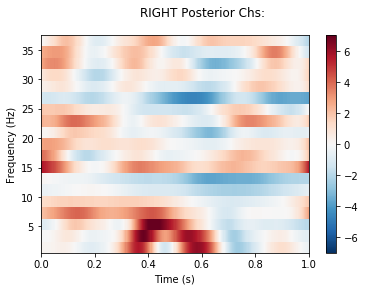

No baseline correction applied


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


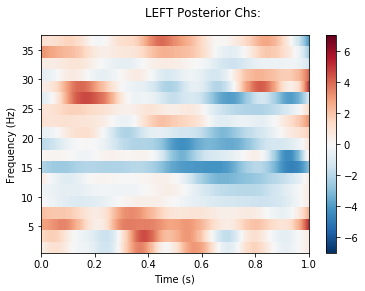

Plotting theta 0-200msec
No baseline correction applied


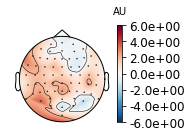

Plotting theta 200-400msec
No baseline correction applied


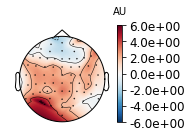

Plotting theta 400-800msec
No baseline correction applied


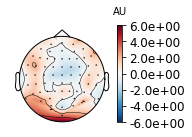

Plotting theta 800-1000msec
No baseline correction applied


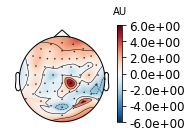

Plotting Alpha band
No baseline correction applied


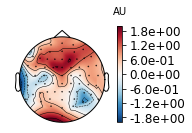

No baseline correction applied


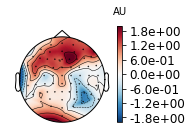

No baseline correction applied


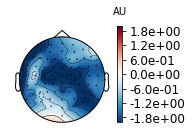

No baseline correction applied


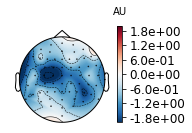

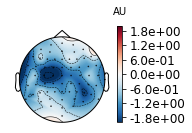

In [22]:
cond='tarLongCue_trig'
## Contrasting with centrally presented:
lat=all_subs_Rights[cond]
center=all_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center
print('\n\nplotting RIGHT hemisphere MINUS neutrals for %s\n' %cond)
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()

print('Plotting theta 0-200msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0,tmax=0.2,vmin=-6,vmax=6)
print('Plotting theta 200-400msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.2,tmax=0.4,vmin=-6,vmax=6)
print('Plotting theta 400-800msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.4,tmax=0.8,vmin=-6,vmax=6)
print('Plotting theta 800-1000msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.8,tmax=1,vmin=-6,vmax=6)

print('Plotting Alpha band')
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)

## Target Cue Long SOA, target cue in Left visual field



plotting LEFT hemisphere MINUS neutrals for tarLongCue_trig

No baseline correction applied


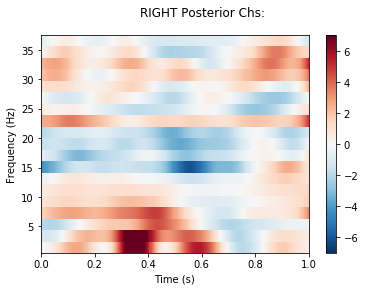

No baseline correction applied


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


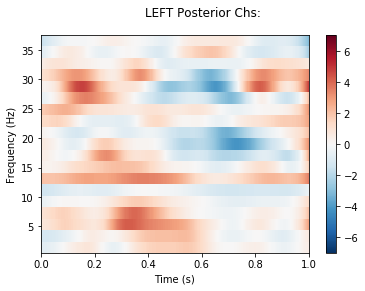

Plotting theta 0-200msec
No baseline correction applied


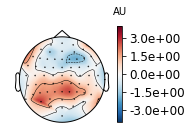

Plotting theta 200-400msec
No baseline correction applied


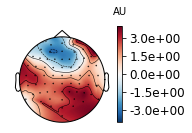

Plotting theta 400-800msec
No baseline correction applied


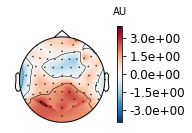

Plotting theta 800-1000msec
No baseline correction applied


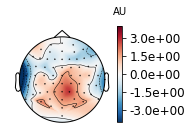

Plotting Alpha band
No baseline correction applied


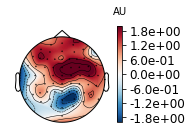

No baseline correction applied


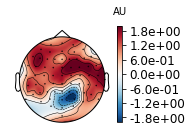

No baseline correction applied


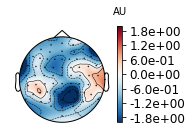

No baseline correction applied


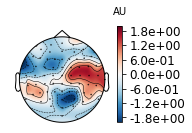

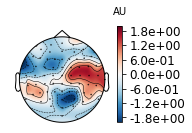

In [23]:
cond='tarLongCue_trig'
## Contrasting with centrally presented:
lat=all_subs_Lefts[cond]
center=all_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center
print('\n\nplotting LEFT hemisphere MINUS neutrals for %s\n' %cond)
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()

print('Plotting theta 0-200msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0,tmax=0.2,vmin=-4,vmax=4)
print('Plotting theta 200-400msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.2,tmax=0.4,vmin=-4,vmax=4)
print('Plotting theta 400-800msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.4,tmax=0.8,vmin=-4,vmax=4)
print('Plotting theta 800-1000msec')
latMinusCenter.plot_topomap(fmin=4,fmax=8,tmin=0.8,tmax=1,vmin=-4,vmax=4)


print('Plotting Alpha band')
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)

## Distractor Long SOA, where distractor is on the right



plotting Right hemisphere MINUS neutral for disLongCue_trig

No baseline correction applied


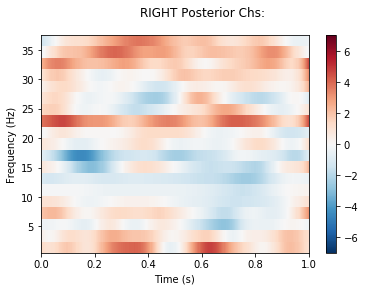

No baseline correction applied


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


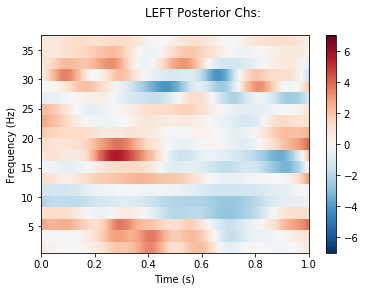

Plotting Alpha band
No baseline correction applied


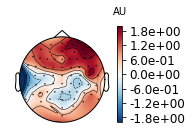

No baseline correction applied


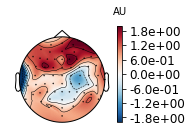

No baseline correction applied


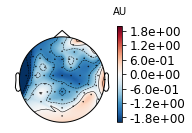

No baseline correction applied


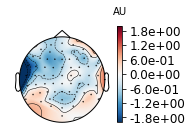

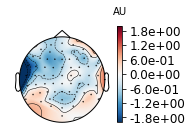

In [24]:
cond='disLongCue_trig'
## Contrasting with centrally presented:
lat=all_subs_Rights[cond]
center=all_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center
print('\n\nplotting Right hemisphere MINUS neutral for %s\n' %cond)
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()

print('Plotting Alpha band')
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)

## Dis Long SOA, distractor on Left



plotting Left hemisphere MINUS neutral for disLongCue_trig

No baseline correction applied


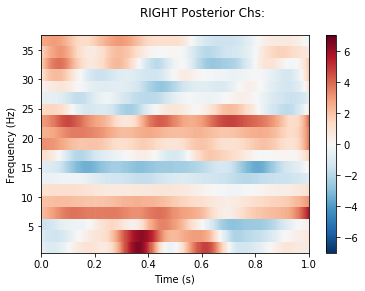

No baseline correction applied


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


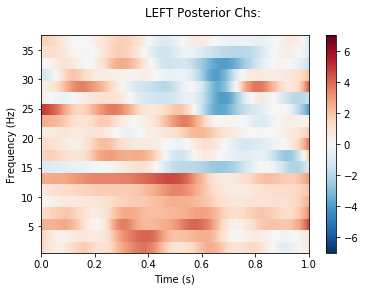

Plotting Alpha band
No baseline correction applied


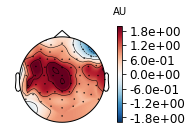

No baseline correction applied


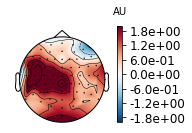

No baseline correction applied


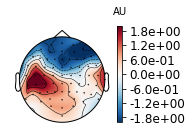

No baseline correction applied


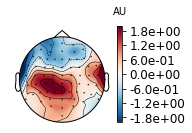

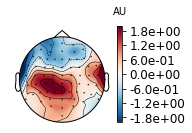

In [25]:
cond='disLongCue_trig'
## Contrasting with centrally presented:
lat=all_subs_Lefts[cond]
center=all_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center
print('\n\nplotting Left hemisphere MINUS neutral for %s\n' %cond)
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=rightPost_elecs,title='RIGHT Posterior Chs:').show()
latMinusCenter.plot(vmin=-7,vmax=7,tmin=0,tmax=1,picks=leftPost_elecs,title='LEFT Posterior Chs:').show()

print('Plotting Alpha band')
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)